In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import numpy as np

In [2]:
endpoint = "https://skynet.coypu.org/qald-x-analysis/"

In [3]:
def KB_query(query, kb_endpoint):
    sparql = SPARQLWrapper(kb_endpoint)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    response = sparql.query().convert()
    results = parse_query_results(response)
    return results

In [4]:
def parse_query_results(response):
    if "boolean" in response: # ASK
        results = [response["boolean"]]
    else:
        if len(response["results"]["bindings"]) > 0 and "callret-0" in response["results"]["bindings"][0]: # COUNT
            results = [response["results"]["bindings"][0]["callret-0"]["value"]]
        else:
            results = []
            for res in response["results"]["bindings"]:
                res = {k: v["value"] for k, v in res.items()}
                results.append(res)
    return results

In [5]:
def reconstruct_query(named_graph_uri, query):
    where_start_idx = query.find("WHERE")
    if where_start_idx < 0:
        print("The keyword WHERE can not be found in query: ", query)
    new_query = query[:where_start_idx] + "FROM " + named_graph_uri + " " + query[where_start_idx:]
    return new_query

In [6]:
# get the distribution of the number of triple patterns

def get_dist_triple_patterns(named_graph_uri):
    orig_query = "SELECT ?tp WHERE { ?s <http://lsq.aksw.org/vocab#text> ?text . ?s <http://lsq.aksw.org/vocab#hasStructuralFeatures> ?sf . ?sf <http://lsq.aksw.org/vocab#tpCount> ?tp. }"
    TP_query = reconstruct_query(named_graph_uri, orig_query)
    TP = KB_query(TP_query, endpoint)
    TP = [int(a["tp"]) for a in TP]
    return TP

def get_dist_joins(named_graph_uri):
    orig_query = "SELECT ?jv WHERE { ?s <http://lsq.aksw.org/vocab#text> ?text . ?s <http://lsq.aksw.org/vocab#hasStructuralFeatures> ?sf . ?sf <http://lsq.aksw.org/vocab#joinVertexCount> ?jv. }"
    Joins_query = reconstruct_query(named_graph_uri, orig_query)
    Joins = KB_query(Joins_query, endpoint)
    Joins = [int(a["jv"]) for a in Joins]
    return Joins

def get_dist_funcs(named_graph_uri):
    orig_query = "SELECT (count(DISTINCT ?text) as ?totalFunc) WHERE { ?s <http://lsq.aksw.org/vocab#text> ?text . ?s <http://lsq.aksw.org/vocab#hasStructuralFeatures> ?sf . ?sf <http://lsq.aksw.org/vocab#usesFeature>  <http://lsq.aksw.org/vocab#Functions> }"
    Funcs_query = reconstruct_query(named_graph_uri, orig_query)
    Funcs = KB_query(Funcs_query, endpoint)
    totalFunc = int(Funcs[0]["totalFunc"])
    return totalFunc

def get_dist_jvd(named_graph_uri):
    orig_query = "SELECT ?jvd WHERE { ?s <http://lsq.aksw.org/vocab#text> ?text . ?s <http://lsq.aksw.org/vocab#hasStructuralFeatures> ?sf . ?sf <http://lsq.aksw.org/vocab#joinVertexDegreeMean> ?jvd. }"
    JVD_query = reconstruct_query(named_graph_uri, orig_query)
    JVD = KB_query(JVD_query, endpoint)
    JVD = [float(a["jvd"]) for a in JVD]
    return JVD

def calculate_variance(dist):
    mean = np.mean(np.array(dist))
    std = np.std(np.array(dist))
    variance = np.var(np.array(dist))
    return mean, std, variance

# QALD-10-Wikidata-Test

In [7]:
dist_triple_patterns_qald10_wikidata_test=get_dist_triple_patterns("<http://lsq.aksw.org/graph#qald10-wikidata-test>")
#print(dist_triple_patterns_qald10_wikidata_test, sep="\t")

In [8]:
mean_tp_qald10_wd_test, std_tp_qald10_wd_test, var_tp_qald10_wd_test = calculate_variance(dist_triple_patterns_qald10_wikidata_test)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_tp_qald10_wd_test, std_tp_qald10_wd_test, var_tp_qald10_wd_test))

Mean: 1.6045918367346939, Std: 1.1991831134256343, Variance: 1.4380401395251978


In [9]:
dist_joins_qald10_wikidata_test=get_dist_joins("<http://lsq.aksw.org/graph#qald10-wikidata-test>")
#print(dist_joins_qald10_wikidata_test, sep="\t")

In [10]:
mean_joins_qald10_wd_test, std_joins_qald10_wd_test, var_joins_qald10_wd_test = calculate_variance(dist_joins_qald10_wikidata_test)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_joins_qald10_wd_test, std_joins_qald10_wd_test, var_joins_qald10_wd_test))

Mean: 0.6224489795918368, Std: 1.1227272382366746, Variance: 1.2605164514785507


In [11]:
dist_jvd_qald10_wikidata_test=get_dist_jvd("<http://lsq.aksw.org/graph#qald10-wikidata-test>")
#print(dist_jvd_qald10_wikidata_test, sep="\t")

In [12]:
mean_jvd_qald10_wd_test, std_jvd_qald10_wd_test, var_jvd_qald10_wd_test = calculate_variance(dist_jvd_qald10_wikidata_test)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_jvd_qald10_wd_test, std_jvd_qald10_wd_test, var_jvd_qald10_wd_test))

Mean: 0.8894740038887755, Std: 1.1333879173018446, Variance: 1.2845681710858128


In [13]:
totalFuncs_qald10_wd_test = get_dist_funcs("<http://lsq.aksw.org/graph#qald10-wikidata-test>")
print("Total queries having functions: ", totalFuncs_qald10_wd_test)

Total queries having functions:  74


# QALD9-Plus-dbpedia-Train

In [14]:
dist_triple_patterns_qald9_dbpedia_train=get_dist_triple_patterns("<http://lsq.aksw.org/graph#qald9-plus-dbpedia-train>")
#print(dist_triple_patterns_qald9_dbpedia_train, sep="\t")

In [15]:
mean_tp_qald9_dbpedia_train, std_tp_qald9_dbpedia_train, var_tp_qald9_dbpedia_train = calculate_variance(dist_triple_patterns_qald9_dbpedia_train)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_tp_qald9_dbpedia_train, std_tp_qald9_dbpedia_train, var_tp_qald9_dbpedia_train))

Mean: 1.727735368956743, Std: 0.943529841082765, Variance: 0.8902485610136679


In [16]:
dist_joins_qald9_dbpedia_train=get_dist_joins("<http://lsq.aksw.org/graph#qald9-plus-dbpedia-train>")
#print(dist_joins_qald9_dbpedia_train, sep="\t")

In [17]:
mean_joins_qald9_dbpedia_train, std_joins_qald9_dbpedia_train, var_joins_qald9_dbpedia_train = calculate_variance(dist_joins_qald9_dbpedia_train)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_joins_qald9_dbpedia_train, std_joins_qald9_dbpedia_train, var_joins_qald9_dbpedia_train))

Mean: 0.5089058524173028, Std: 0.6619787392259084, Variance: 0.43821585118712325


In [18]:
dist_jvd_qald9_dbpedia_train=get_dist_jvd("<http://lsq.aksw.org/graph#qald9-plus-dbpedia-train>")
#print(dist_jvd_qald9_dbpedia_train, sep="\t")

In [19]:
mean_jvd_qald9_dbpedia_train, std_jvd_qald9_dbpedia_train, var_jvd_qald9_dbpedia_train = calculate_variance(dist_jvd_qald9_dbpedia_train)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_jvd_qald9_dbpedia_train, std_jvd_qald9_dbpedia_train, var_jvd_qald9_dbpedia_train))

Mean: 0.9410517387620865, Std: 1.1134359842993444, Variance: 1.23973969113265


In [20]:
totalFuncs_qald9_dbpeida_train = get_dist_funcs("<http://lsq.aksw.org/graph#qald9-plus-dbpedia-train>")
print("Total queries having functions: ", totalFuncs_qald9_dbpeida_train)

Total queries having functions:  31


# QALD9-Plus-dbpedia-Test

In [21]:
dist_triple_patterns_qald9_dbpedia_test=get_dist_triple_patterns("<http://lsq.aksw.org/graph#qald9-plus-dbpedia-test>")
#print(dist_triple_patterns_qald9_dbpedia_test, sep="\t")

In [22]:
mean_tp_qald9_dbpedia_test, std_tp_qald9_dbpedia_test, var_tp_qald9_dbpedia_test = calculate_variance(dist_triple_patterns_qald9_dbpedia_test)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_tp_qald9_dbpedia_test, std_tp_qald9_dbpedia_test, var_tp_qald9_dbpedia_test))

Mean: 1.9932885906040267, Std: 1.167206521728897, Variance: 1.3623710643664702


In [23]:
dist_joins_qald9_dbpedia_test=get_dist_joins("<http://lsq.aksw.org/graph#qald9-plus-dbpedia-test>")
#print(dist_joins_qald9_dbpedia_test, sep="\t")

In [24]:
mean_joins_qald9_dbpedia_test, std_joins_qald9_dbpedia_test, var_joins_qald9_dbpedia_test = calculate_variance(dist_joins_qald9_dbpedia_test)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_joins_qald9_dbpedia_test, std_joins_qald9_dbpedia_test, var_joins_qald9_dbpedia_test))

Mean: 0.7114093959731543, Std: 0.8692765024801168, Variance: 0.7556416377640645


In [25]:
dist_jvd_qald9_dbpedia_test=get_dist_jvd("<http://lsq.aksw.org/graph#qald9-plus-dbpedia-test>")
#print(dist_jvd_qald9_dbpedia_test, sep="\t")

In [26]:
mean_jvd_qald9_dbpedia_test, std_jvd_qald9_dbpedia_test, var_jvd_qald9_dbpedia_test = calculate_variance(dist_jvd_qald9_dbpedia_test)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_jvd_qald9_dbpedia_test, std_jvd_qald9_dbpedia_test, var_jvd_qald9_dbpedia_test))

Mean: 1.0894854586134228, Std: 1.1160351631712604, Variance: 1.245534485434702


In [27]:
totalFuncs_qald9_dbpeida_test = get_dist_funcs("<http://lsq.aksw.org/graph#qald9-plus-dbpedia-test>")
print("Total queries having functions: ", totalFuncs_qald9_dbpeida_test)

Total queries having functions:  17


# QALD9-Plus-wikidata-Train

In [28]:
dist_triple_patterns_qald9_wikidata_train=get_dist_triple_patterns("<http://lsq.aksw.org/graph#qald9-plus-wikidata-train>")
#print(dist_triple_patterns_qald9_wikidata_train, sep="\t")

In [29]:
mean_tp_qald9_wd_train, std_tp_qald9_wd_train, var_tp_qald9_wd_train = calculate_variance(dist_triple_patterns_qald9_wikidata_train)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_tp_qald9_wd_train, std_tp_qald9_wd_train, var_tp_qald9_wd_train))

Mean: 1.6850828729281768, Std: 1.2146657311523796, Variance: 1.4754128384359448


In [30]:
dist_joins_qald9_wikidata_train=get_dist_joins("<http://lsq.aksw.org/graph#qald9-plus-wikidata-train>")
#print(dist_joins_qald9_wikidata_train, sep="\t")

In [31]:
mean_joins_qald9_wd_train, std_joins_qald9_wd_train, var_joins_qald9_wd_train = calculate_variance(dist_joins_qald9_wikidata_train)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_joins_qald9_wd_train, std_joins_qald9_wd_train, var_joins_qald9_wd_train))

Mean: 0.5773480662983426, Std: 0.9288712542794332, Variance: 0.8628018070266474


In [32]:
dist_jvd_qald9_wikidata_train=get_dist_jvd("<http://lsq.aksw.org/graph#qald9-plus-wikidata-train>")
#print(dist_jvd_qald9_wikidata_train, sep="\t")

In [33]:
mean_jvd_qald9_wd_train, std_jvd_qald9_wd_train, var_jvd_qald9_wd_train = calculate_variance(dist_jvd_qald9_wikidata_train)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_jvd_qald9_wd_train, std_jvd_qald9_wd_train, var_jvd_qald9_wd_train))

Mean: 0.9527163904243093, Std: 1.1480611220972257, Variance: 1.318044340071141


In [34]:
totalFuncs_qald9_wd_train = get_dist_funcs("<http://lsq.aksw.org/graph#qald9-plus-wikidata-train>")
print("Total queries having functions: ", totalFuncs_qald9_wd_train)

Total queries having functions:  31


# QALD9-Plus-wikidata-Test

In [35]:
dist_triple_patterns_qald9_wikidata_test=get_dist_triple_patterns("<http://lsq.aksw.org/graph#qald9-plus-wikidata-test>")
#print(dist_triple_patterns_qald9_wikidata_test, sep="\t")

In [36]:
mean_tp_qald9_wd_test, std_tp_qald9_wd_test, var_tp_qald9_wd_test = calculate_variance(dist_triple_patterns_qald9_wikidata_test)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_tp_qald9_wd_test, std_tp_qald9_wd_test, var_tp_qald9_wd_test))

Mean: 1.6397058823529411, Std: 0.9975911731711179, Variance: 0.9951881487889274


In [37]:
dist_joins_qald9_wikidata_test=get_dist_joins("<http://lsq.aksw.org/graph#qald9-plus-wikidata-test>")
#print(dist_joins_qald9_wikidata_test, sep="\t")

In [38]:
mean_joins_qald9_wd_test, std_joins_qald9_wd_test, var_joins_qald9_wd_test = calculate_variance(dist_joins_qald9_wikidata_test)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_joins_qald9_wd_test, std_joins_qald9_wd_test, var_joins_qald9_wd_test))

Mean: 0.5073529411764706, Std: 0.6859549325940976, Variance: 0.47053416955017296


In [39]:
dist_jvd_qald9_wikidata_test=get_dist_jvd("<http://lsq.aksw.org/graph#qald9-plus-wikidata-test>")
#print(dist_jvd_qald9_wikidata_test, sep="\t")

In [40]:
mean_jvd_qald9_wd_test, std_jvd_qald9_wd_test, var_jvd_qald9_wd_test = calculate_variance(dist_jvd_qald9_wikidata_test)
print("Mean: {0}, Std: {1}, Variance: {2}".format(mean_jvd_qald9_wd_test, std_jvd_qald9_wd_test, var_jvd_qald9_wd_test))

Mean: 0.9289215686279411, Std: 1.1760186019021261, Variance: 1.3830197520198313


In [41]:
totalFuncs_qald9_wd_test = get_dist_funcs("<http://lsq.aksw.org/graph#qald9-plus-wikidata-test>")
print("Total queries having functions: ", totalFuncs_qald9_wd_test)

Total queries having functions:  13


# Plotting

In [42]:
import matplotlib.pyplot as plt

def plot_box(columns, xticks, title):
    fig, ax = plt.subplots()
    ax.boxplot(columns)
    ax.set_title(title)
    plt.xticks([1, 2, 3, 4, 5], xticks, rotation=10)
    plt.show()

In [43]:
xticks = ["QALD10-wd-test", "QALD9-plus-dbpedia-train", "QALD9-plus-dbpedia-test", "QALD9-plus-wd-train", "QALD9-plus-wd-test"]

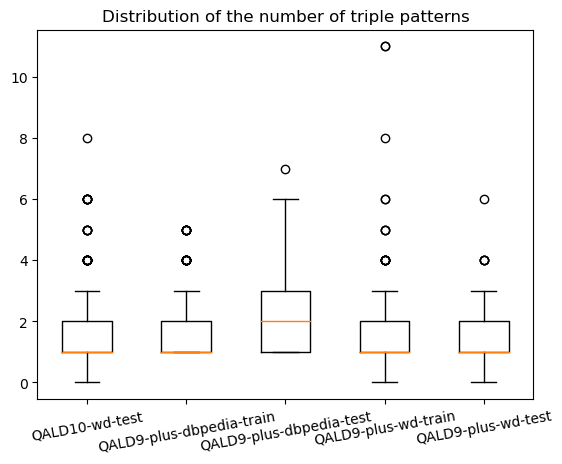

In [44]:
columns = [dist_triple_patterns_qald10_wikidata_test, dist_triple_patterns_qald9_dbpedia_train, dist_triple_patterns_qald9_dbpedia_test, dist_triple_patterns_qald9_wikidata_train, dist_triple_patterns_qald9_wikidata_test]
title = "Distribution of the number of triple patterns"
plot_box(columns, xticks, title)

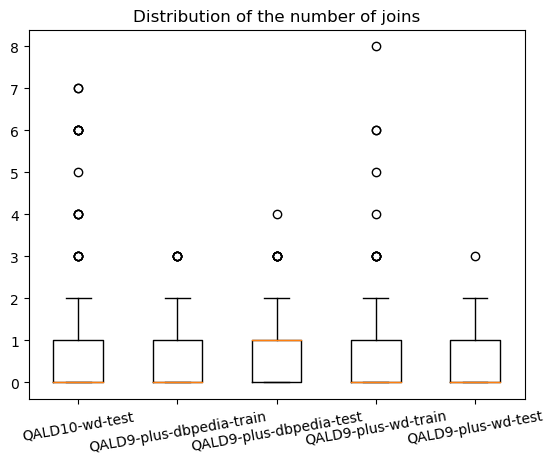

In [45]:
columns = [dist_joins_qald10_wikidata_test, dist_joins_qald9_dbpedia_train, dist_joins_qald9_dbpedia_test, dist_joins_qald9_wikidata_train, dist_joins_qald9_wikidata_test]
title = "Distribution of the number of joins"
plot_box(columns, xticks, title)

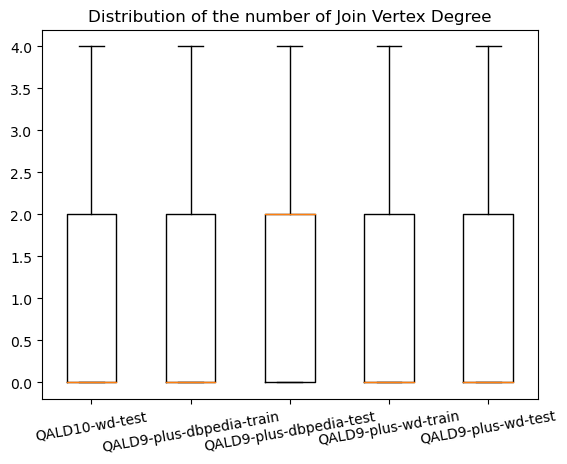

In [46]:
columns = [dist_jvd_qald10_wikidata_test, dist_jvd_qald9_dbpedia_train, dist_jvd_qald9_dbpedia_test, dist_jvd_qald9_wikidata_train, dist_jvd_qald9_wikidata_test]
title = "Distribution of the number of Join Vertex Degree"
plot_box(columns, xticks, title)

In [47]:
def plot_bar(data, title):

    # set width of bar
    barWidth = 0.25
    fig, ax = plt.subplots(figsize =(8, 8))

    # Set position of bar on X axis
    br1 = np.arange(len(data[0]))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # Make the plot
    plt.bar(br1, data[0], color ='r', width = barWidth,
            edgecolor ='grey', label ='mean')
    plt.bar(br2, data[1], color ='g', width = barWidth,
            edgecolor ='grey', label ='std')
    plt.bar(br3, data[2], color ='b', width = barWidth,
            edgecolor ='grey', label ='variance')

    # Adding Xticks
    plt.xticks([r + barWidth for r in range(len(data[0]))],
            ["QALD10-wd-test", "QALD9-plus-dbpedia-train", "QALD9-plus-dbpedia-test", "QALD9-plus-wd-train", "QALD9-plus-wd-test"], rotation=10)
    ax.set_title(title)
    plt.legend()
    plt.show()

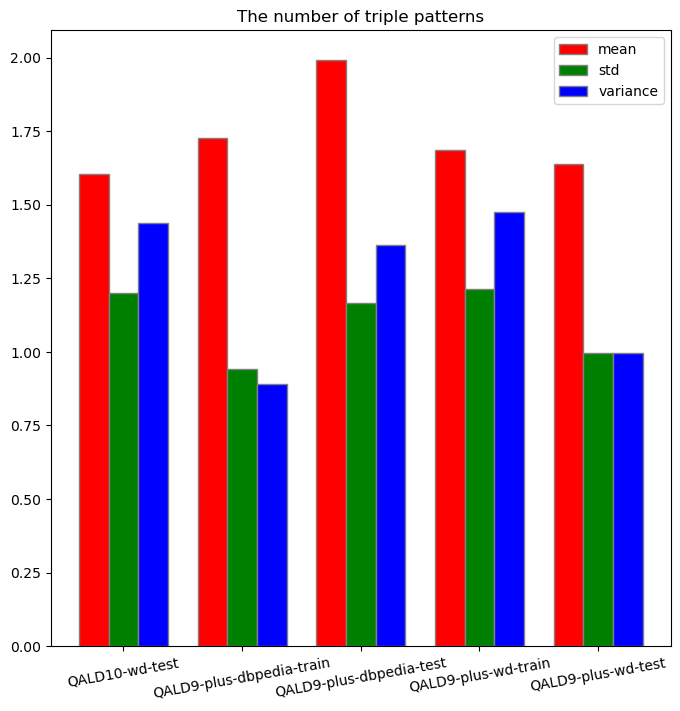

In [48]:
plot_bar([
    [mean_tp_qald10_wd_test, mean_tp_qald9_dbpedia_train, mean_tp_qald9_dbpedia_test, mean_tp_qald9_wd_train, mean_tp_qald9_wd_test],
    [std_tp_qald10_wd_test, std_tp_qald9_dbpedia_train, std_tp_qald9_dbpedia_test, std_tp_qald9_wd_train, std_tp_qald9_wd_test],
    [var_tp_qald10_wd_test, var_tp_qald9_dbpedia_train, var_tp_qald9_dbpedia_test, var_tp_qald9_wd_train, var_tp_qald9_wd_test]
], "The number of triple patterns")

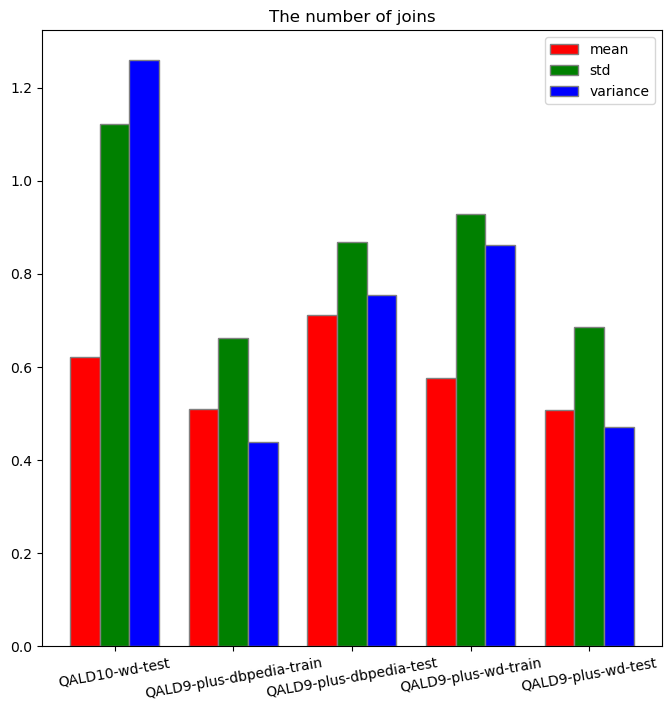

In [49]:
plot_bar([
    [mean_joins_qald10_wd_test, mean_joins_qald9_dbpedia_train, mean_joins_qald9_dbpedia_test, mean_joins_qald9_wd_train, mean_joins_qald9_wd_test],
    [std_joins_qald10_wd_test, std_joins_qald9_dbpedia_train, std_joins_qald9_dbpedia_test, std_joins_qald9_wd_train, std_joins_qald9_wd_test],
    [var_joins_qald10_wd_test, var_joins_qald9_dbpedia_train, var_joins_qald9_dbpedia_test, var_joins_qald9_wd_train, var_joins_qald9_wd_test]
], "The number of joins")

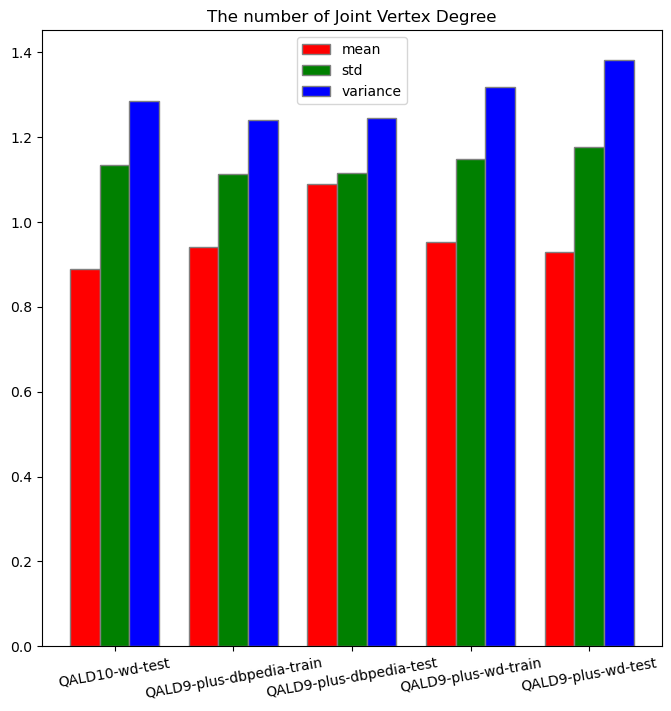

In [50]:
plot_bar([
    [mean_jvd_qald10_wd_test, mean_jvd_qald9_dbpedia_train, mean_jvd_qald9_dbpedia_test, mean_jvd_qald9_wd_train, mean_jvd_qald9_wd_test],
    [std_jvd_qald10_wd_test, std_jvd_qald9_dbpedia_train, std_jvd_qald9_dbpedia_test, std_jvd_qald9_wd_train, std_jvd_qald9_wd_test],
    [var_jvd_qald10_wd_test, var_jvd_qald9_dbpedia_train, var_jvd_qald9_dbpedia_test, var_jvd_qald9_wd_train, var_jvd_qald9_wd_test]
], "The number of Joint Vertex Degree")